In [1]:
## INITIAL SETUP Test stuff from one of our activities
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import random
import statistics

# Load data for activity
#
image = mpimg.imread('./randall.png') ## Image Array is MxNx3
print(image.shape)

(399, 600, 3)


In [2]:
## NOISE FUNCTION
def noise(image,probability,rgb):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - probability
    if(rgb == True):
        for i in range(image.shape[0]): # Each Pixel X
            for j in range(image.shape[1]): # Each Pixel Y
                for k in range(image.shape[2]): #Each of the 3 color values (R,G,B)
                    rdn = random.random() 
                    if rdn < probability:
                        output[i][j][k] = 0.0 # Empty, no color on that value, if rgb for this pixel is 0,0,0 color is White
                    elif rdn > thres:
                        output[i][j][k] = 1.0 # Highest value a color value can take, if rgb for this pixel are all 1, color is Black
                    else:
                        output[i][j][k] = image[i][j][k] # copy original's pixel r,g,b if probability not met
    else:
        for i in range(image.shape[0]): # Each Pixel X
            for j in range(image.shape[1]): # Each Pixel Y
                rdn = random.random() 
                if rdn < probability:
                    output[i][j] = 0.0 # Empty, no color on that value, if rgb for this pixel is 0,0,0 color is White
                elif rdn > thres:
                    output[i][j] = 1.0 # Highest value a color value can take, if rgb for this pixel are all 1, color is Black
                else:
                    output[i][j] = image[i][j] # copy original's pixel if probability not met
    return output


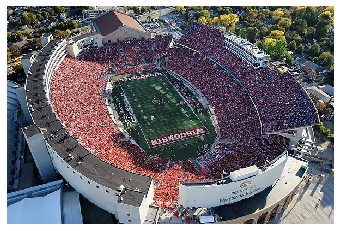

In [3]:
# Display Original
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(image)
ax.set_axis_off()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


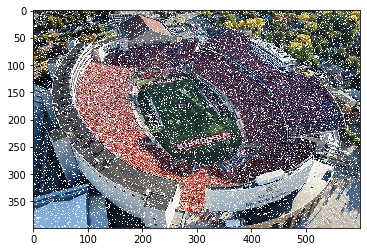

In [4]:
## Noisy Image
imageN = image+noise(image,0.10,False)
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.imshow(imageN)
plt.show()

In [5]:
## SVD Section, introduction

In [6]:
## Regularization 

In [7]:
## Regularization through LASSO

In [8]:
## Median Filter section
def med_filter(image,ksize):
    output = np.zeros(image.shape)
    for i in range(image.shape[0]): # Each Pixel X
        for j in range(image.shape[1]): # Each Pixel Y
            valList = []
            #print(i,"i")
            #print(j,"j")
            for x in range((i-ksize),(i+ksize),1):
                for y in range((j-ksize),(j+ksize),1):
                    #print(x," is x")
                    #print(y," is y")
                    if(x < image.shape[0]-1 and x>=0):
                        if(y < image.shape[1]-1 and y>=0):
                            valList.append(image[x][y])
                            #print("valid median point")
            if valList:
                    #print(valList)
                    value = np.median(valList,axis=0)
                    #print(value,image[i][j])
                    output[i][j] = value
            else:
                    output[i][j] = image[i][j]
        
    return output
imageD =med_filter(imageN,1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


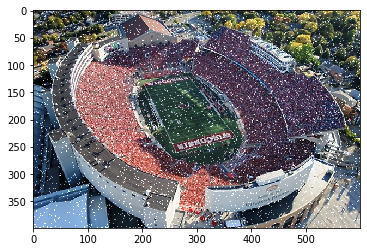

In [9]:
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.imshow(imageD)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


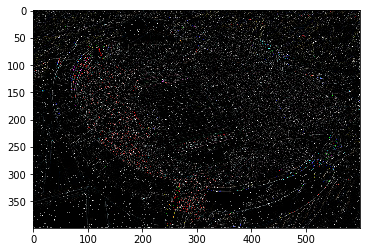